# Mordern Applyed Statistics(Chap 11)

### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 11.1 Visualization methods

In [2]:
# data load

## Iris
from sklearn.datasets import load_iris
iris = load_iris()
ir = pd.DataFrame(data=iris.data, columns=iris.feature_names)
ir_target = iris.target
ir_target_name = iris.target_names

## Crabs data
crabs = pd.read_csv("../data/crabs.csv")
lcrabs = np.log(crabs.iloc[:,3:])
lcrabs_grp = list(np.repeat(["B","b","O","o"], [50]*4, axis = 0))
lcrabs_target = np.repeat([0,1,2,3], [50]*4, axis = 0)
lcrabs_target_name = np.array(["B","b","O","o"])

### 1) Principal Component analysis

#### Principal Component for the iris data.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std = StandardScaler().fit_transform(np.log(ir))
pca = PCA()
ir_pca = pca.fit_transform(std)

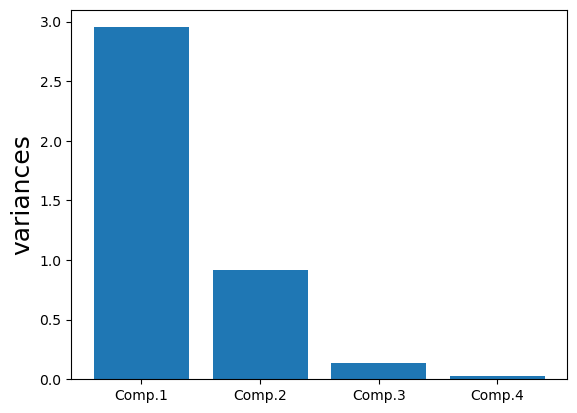

In [4]:
plt.bar(['Comp.1', 'Comp.2', 'Comp.3', 'Comp.4'], pca.explained_variance_)
plt.ylabel('variances', fontsize = 18)
plt.show()

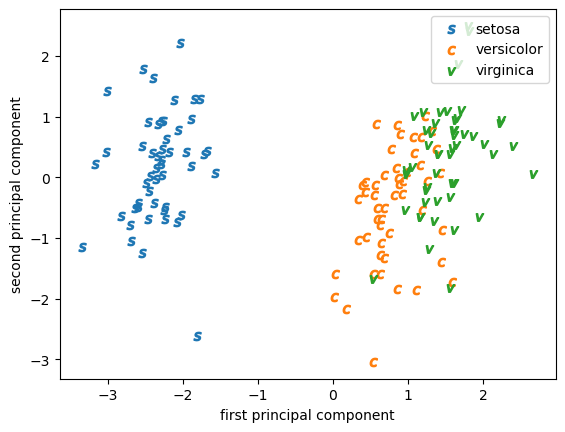

In [5]:
pca = PCA(n_components=2)
ir_pca = pca.fit_transform(std)
pca_columns=['Comp1','Comp2']
ir_pca_df = pd.DataFrame(-ir_pca, columns=pca_columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp1']
    y_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

#### Principal Component for the crabs data.

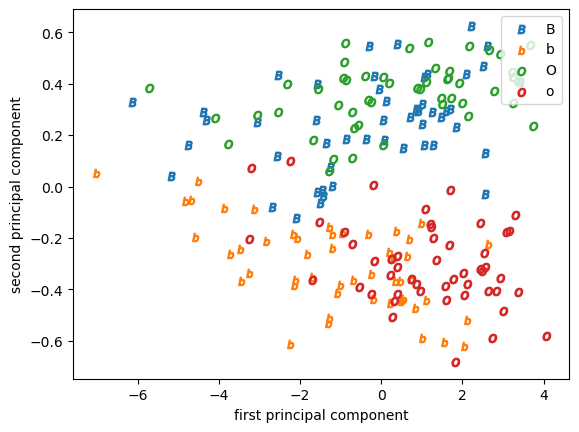

In [6]:
std = StandardScaler().fit_transform(lcrabs)
pca = PCA(n_components=2)
lcrabs_pca = pca.fit_transform(std)
pca_columns=['Comp1','Comp2']
lcrabs_pca_df = pd.DataFrame(-lcrabs_pca, columns=pca_columns)


markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp1']
    y_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

### 2) Exploratory projection pursuit

In [7]:
# Null

### 3) Distance methods

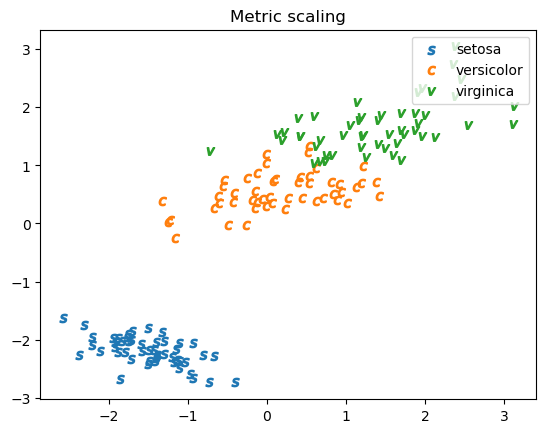

In [8]:
from sklearn import manifold

mds = manifold.MDS(2, dissimilarity='euclidean')
coords = mds.fit(ir)
mds_columns=['x','y']
ir_mds_df = pd.DataFrame(-coords.embedding_, columns=mds_columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_mds_df.loc[ir_target==i,:]['x']
    y_axis_data = ir_mds_df.loc[ir_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Metric scaling')
plt.show()

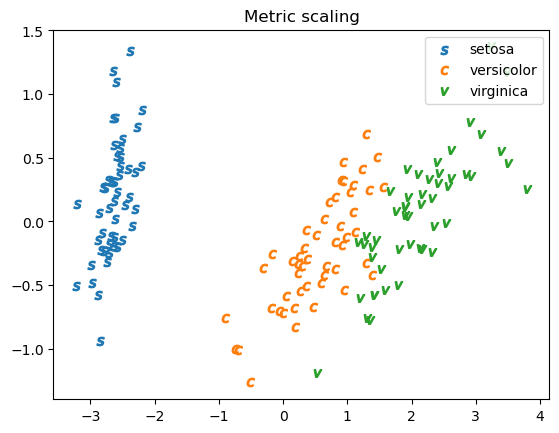

In [9]:
from cmdscale import cmdscale
from scipy.spatial.distance import cdist

y, evals = cmdscale(cdist(ir, ir, 'euclidean'))
mds_columns=['x','y']
ir_cmd_df = pd.DataFrame(y[:,0:2], columns=mds_columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_cmd_df.loc[ir_target==i,:]['x']
    y_axis_data = ir_cmd_df.loc[ir_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Metric scaling')
plt.show()

TolFun exceeded: Optimisation terminated


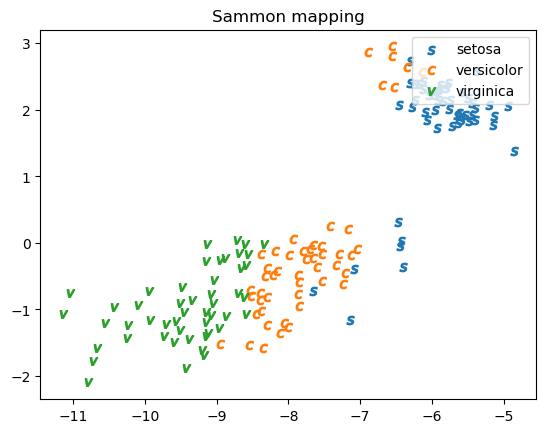

In [10]:
from sammon import sammon

(x,index) = np.unique(iris.data,axis=0,return_index=True)

y, E = sammon(x, n = 2)
y[:,1] = y[:,1]
mds_columns=['x','y']
ir_sammon_df = pd.DataFrame(y, columns=mds_columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

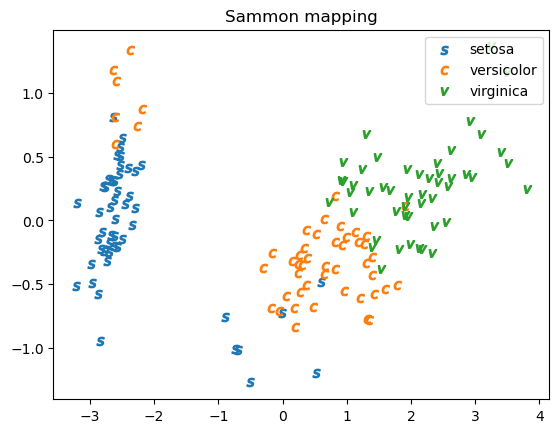

In [11]:
from sammon import sammon

(x,index) = np.unique(iris.data,axis=0,return_index=True)

y, evals = cmdscale(cdist(x, x))
y[:,1] = -y[:,1]
mds_columns=['x','y']
ir_sammon_df = pd.DataFrame(y[:,0:2], columns=mds_columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

Unable to determine R home: [WinError 2] 지정된 파일을 찾을 수 없습니다


initial  value 3.024856 
iter   5 value 2.638471
final  value 2.579979 
converged


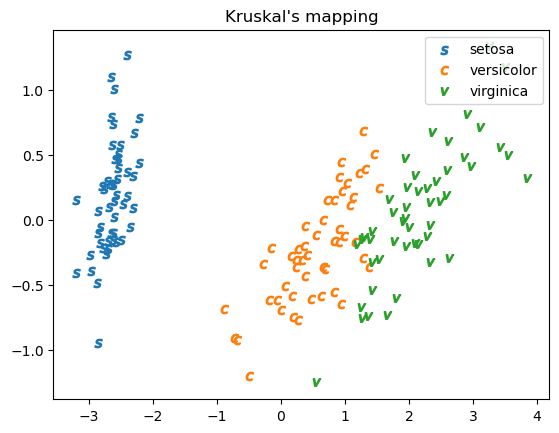

In [12]:
from rpy2.robjects import r

r('library(MASS)')
r('ir <- rbind(iris3[,,1], iris3[,,2], iris3[,,3])')
r('ir.iso <- isoMDS(dist(ir[-143,]))')
ir_iso = r('ir.iso$points')

mds_columns=['x','y']
ir_iso_df = pd.DataFrame({'x' : list(ir_iso[0:149]), 'y' : list(ir_iso[149:])})

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

- **Crabs**

TolFun exceeded: Optimisation terminated


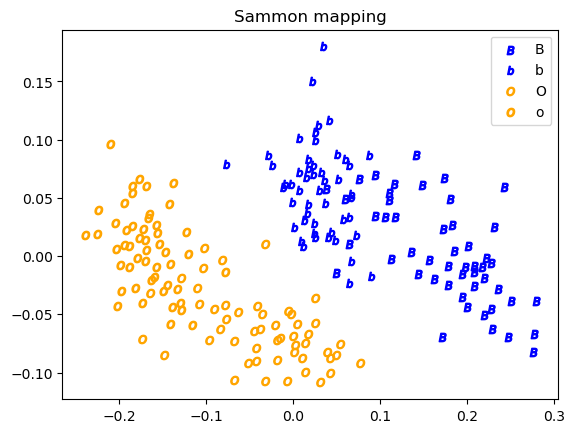

In [13]:
cr_scale = 0.5 * np.log(crabs['CL'] * crabs['CW'])
slcrabs = lcrabs - pd.DataFrame(np.array([cr_scale]*5), index = lcrabs.columns).transpose()
cr_means = np.zeros((2, 5))
cr_means[0,:] = slcrabs[crabs['sex'] == 'F'].mean(axis = 0)
cr_means[1,:] = slcrabs[crabs['sex'] == 'M'].mean(axis = 0)
dslcrabs = slcrabs - cr_means[np.repeat([0,1], [100,100], axis = 0),]

from sammon import sammon

y, E = sammon(dslcrabs, n = 2)
y[:,1] = y[:,1]
mds_columns=['x','y']
lcrabs_sammon_df = pd.DataFrame(y, columns=mds_columns)

markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['x']
    y_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i], color='blue' if marker in ['$B$', '$b$']  else 'orange')

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

- **fgl**

initial  value 11.518169 
iter   5 value 6.353547
iter  10 value 5.993823
iter  15 value 5.913937
final  value 5.888284 
converged


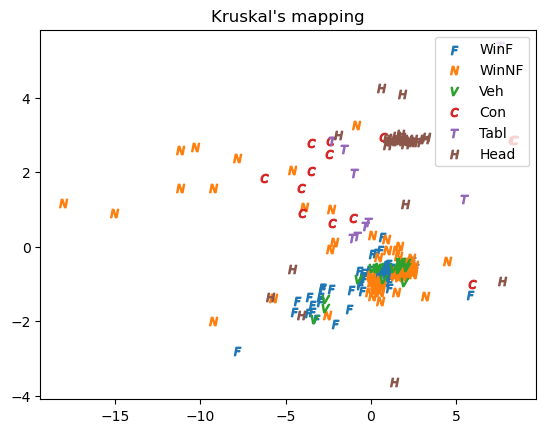

In [14]:
r('library(MASS)')
r('fgl.iso <- isoMDS(dist(as.matrix(fgl[-40, -10])))')
fgl_iso = r('fgl.iso$points')
fgl_target = r('as.numeric(fgl$type)-1')
fgl_target_name = r('levels(fgl$type)')

fgl_iso_df = pd.DataFrame({'x' : list(fgl_iso[0:213]), 'y' : list(fgl_iso[213:])})

markers=['$F$', '$N$', '$V$', '$C$', '$T$', '$H$']
for i, marker in enumerate(markers):
    x_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['x']
    y_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=fgl_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

### 4) Self-Organizing maps

In [15]:
# pip install sklearn_som
from sklearn_som.som import SOM

lcrabs_som = SOM(m=4, n=1, dim=5)
lcrabs_som.fit(np.array(lcrabs))
predictions = lcrabs_som.predict(np.array(lcrabs))

In [16]:
predictions

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

### 5) Biplots

In [23]:
## State.x77 data
state = pd.read_csv("../data/state.x77.csv").iloc[:,1:7]
state.index = r('state.abb')

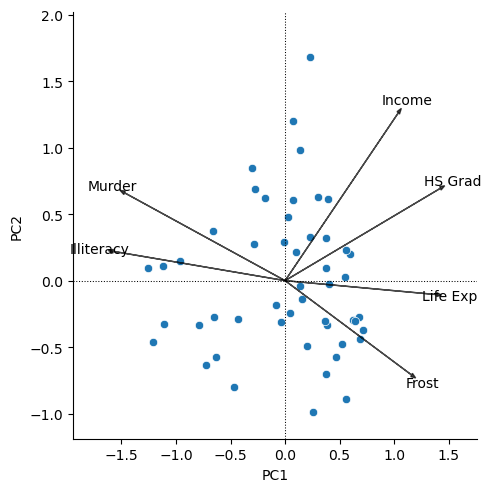

In [24]:
from biplot import eigen_scaling, biplot
from statsmodels.multivariate.pca import PCA

state_pca = PCA(data = state, standardize = True, normalize = True, ncomp = 2)
biplot(pca = state_pca, scaling = 2, plot_loading_labels = True)

### 6) Independent component analysis

In [39]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
crabs_ica = ica.fit_transform(crabs.iloc[:,3:8])

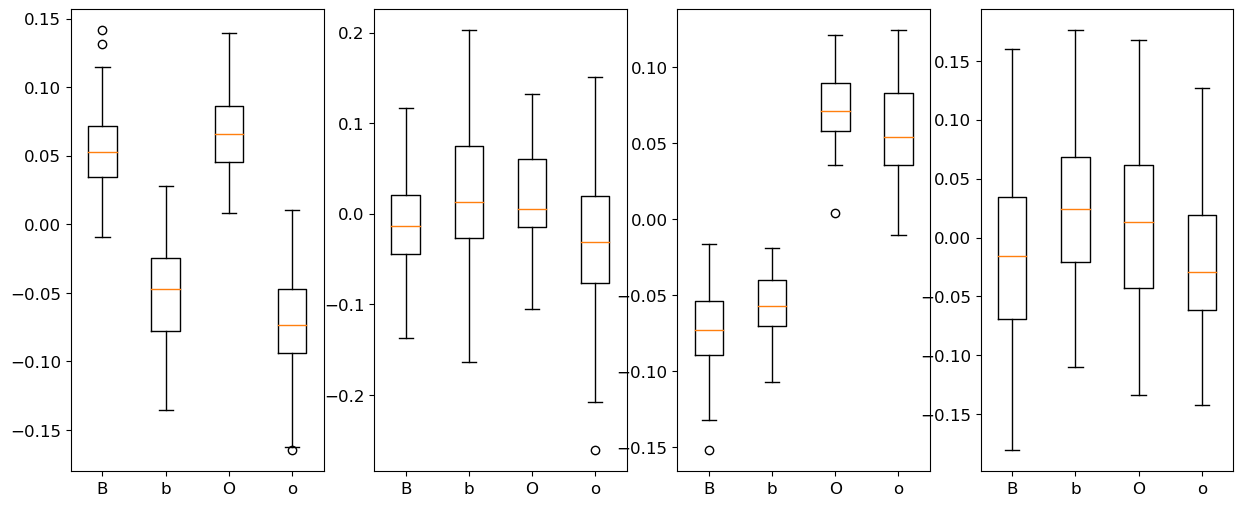

In [ ]:
plt.style.use('default')
plt.rcParams['font.size'] = 12
fig,ax=plt.subplots(nrows=1,ncols=4, figsize=(15, 6))

for i in range(4):    
    crabs_ica_df = pd.DataFrame({'B' : crabs_ica[0:50,i],
                                 'b' : crabs_ica[50:100,i],
                                 'O' : crabs_ica[100:150,i],
                                 'o' : crabs_ica[150:200,i]})
    
    ax[i].boxplot(crabs_ica_df)
    ax[i].set_xticklabels(["B","b","O","o"])
    
plt.show()

### 7) Glyph representations